In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tables
from phd.utils.path_tools import find_by_meta

In [3]:
# path = "/mnt/storage2/phd/data/thunderstorm/diffModels/result_1_1e4.hdf5"
path = "/home/zelenyy/temp/phd-run/result.hdf5"


In [8]:
with tables.open_file(path) as h5file:
    data = h5file.get_node("/sim0001", "electron").read()

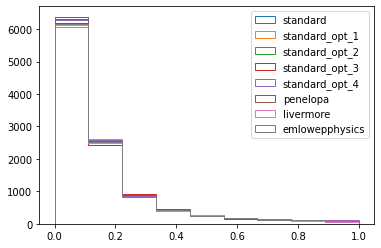

In [28]:
paths = find_by_meta(path,target_node="electron", values_gdml_fieldValueZ=10e-4)
with tables.open_file(path) as h5file:
    for node_path in paths:
        table = h5file.get_node(node_path)
        phys = table.attrs["values_macros_physics"]
        data = table.read()
        plt.hist(data["energy"],bins=np.linspace(0,1,10), histtype="step", label=phys)
    plt.legend();

0
0
0


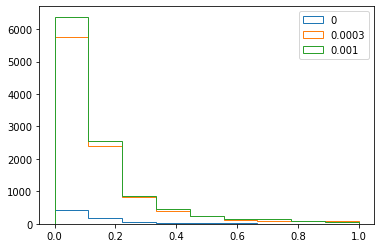

In [24]:
paths = find_by_meta(path,target_node="electron", values_macros_physics="standard")
with tables.open_file(path) as h5file:
    for node_path in paths:
        table = h5file.get_node(node_path)
        field = table.attrs["values_gdml_fieldValueZ"]
        data = table.read()
        print(np.sum(data["energy"] == 0.0))
        plt.hist(data["energy"],bins=np.linspace(0,1,10), histtype="step", label=str(field))
    plt.legend();

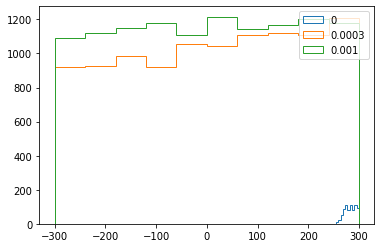

In [23]:
paths = find_by_meta(path,target_node="electron", values_macros_physics="standard")
with tables.open_file(path) as h5file:
    for node_path in paths:
        table = h5file.get_node(node_path)
        field = table.attrs["values_gdml_fieldValueZ"]
        data = table.read()
        # print(np.sum(data["energy"] == 0.0))
        plt.hist(data["z"], histtype="step", label=str(field))
    plt.legend();
